# 0: Load the model

In [1]:
import torch
from torch import nn

In [2]:
class MNIST_CNN(nn.Module):
    def __init__(self):
        super(MNIST_CNN, self).__init__()
        self.fc = nn.Sequential(
            nn.Conv2d(1, 10, kernel_size=5),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(10, 20, kernel_size=5),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Flatten(),
            nn.Linear(320, 50),
            nn.Linear(50, 10),
        )

    def forward(self, x):
        x = self.fc(x)
        return x

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [4]:
model = MNIST_CNN()
model.load_state_dict(
    torch.load("./MNIST-MODEL.pth", map_location=torch.device(device))
)
model.eval()

MNIST_CNN(
  (fc): Sequential(
    (0): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Flatten(start_dim=1, end_dim=-1)
    (7): Linear(in_features=320, out_features=50, bias=True)
    (8): Linear(in_features=50, out_features=10, bias=True)
  )
)

# 1: test it

In [5]:
import struct
import numpy as np

In [6]:
def load_images(filepath):
    with open(filepath, "rb") as f:
        magic, num, rows, cols = struct.unpack(">IIII", f.read(16))
        images = (
            np.frombuffer(f.read(), dtype=np.uint8)
            .reshape(num, 1, rows, cols)
            .astype(np.float32)
            / 255.0
        )
    return images

In [7]:
def load_labels(filepath):
    with open(filepath, "rb") as f:
        magic, num = struct.unpack(">II", f.read(8))
        labels = np.frombuffer(f.read(), dtype=np.uint8)
    return labels

In [8]:
test_images_path = "./dataset/test/t10k-images-idx3-ubyte"
test_labels_path = "./dataset/test/t10k-labels-idx1-ubyte"
images = load_images(test_images_path)
labels = load_labels(test_labels_path)

In [9]:
import matplotlib.pyplot as plt

In [10]:
def predict_nth_image(ax, n):
    image = images[n]  # shape: (1, 28, 28)
    label = labels[n]

    # Prepare image tensor
    image_tensor = torch.tensor(image).unsqueeze(0).to(device)  # shape: (1, 1, 28, 28)

    # Model prediction
    model.eval()
    with torch.no_grad():
        output = model(image_tensor)
        pred = output.argmax(dim=1).item()

    # Display image
    ax.imshow(image.squeeze(), cmap="gray")
    ax.set_title(f"label: {label}, pred: {pred}")
    ax.axis("off")

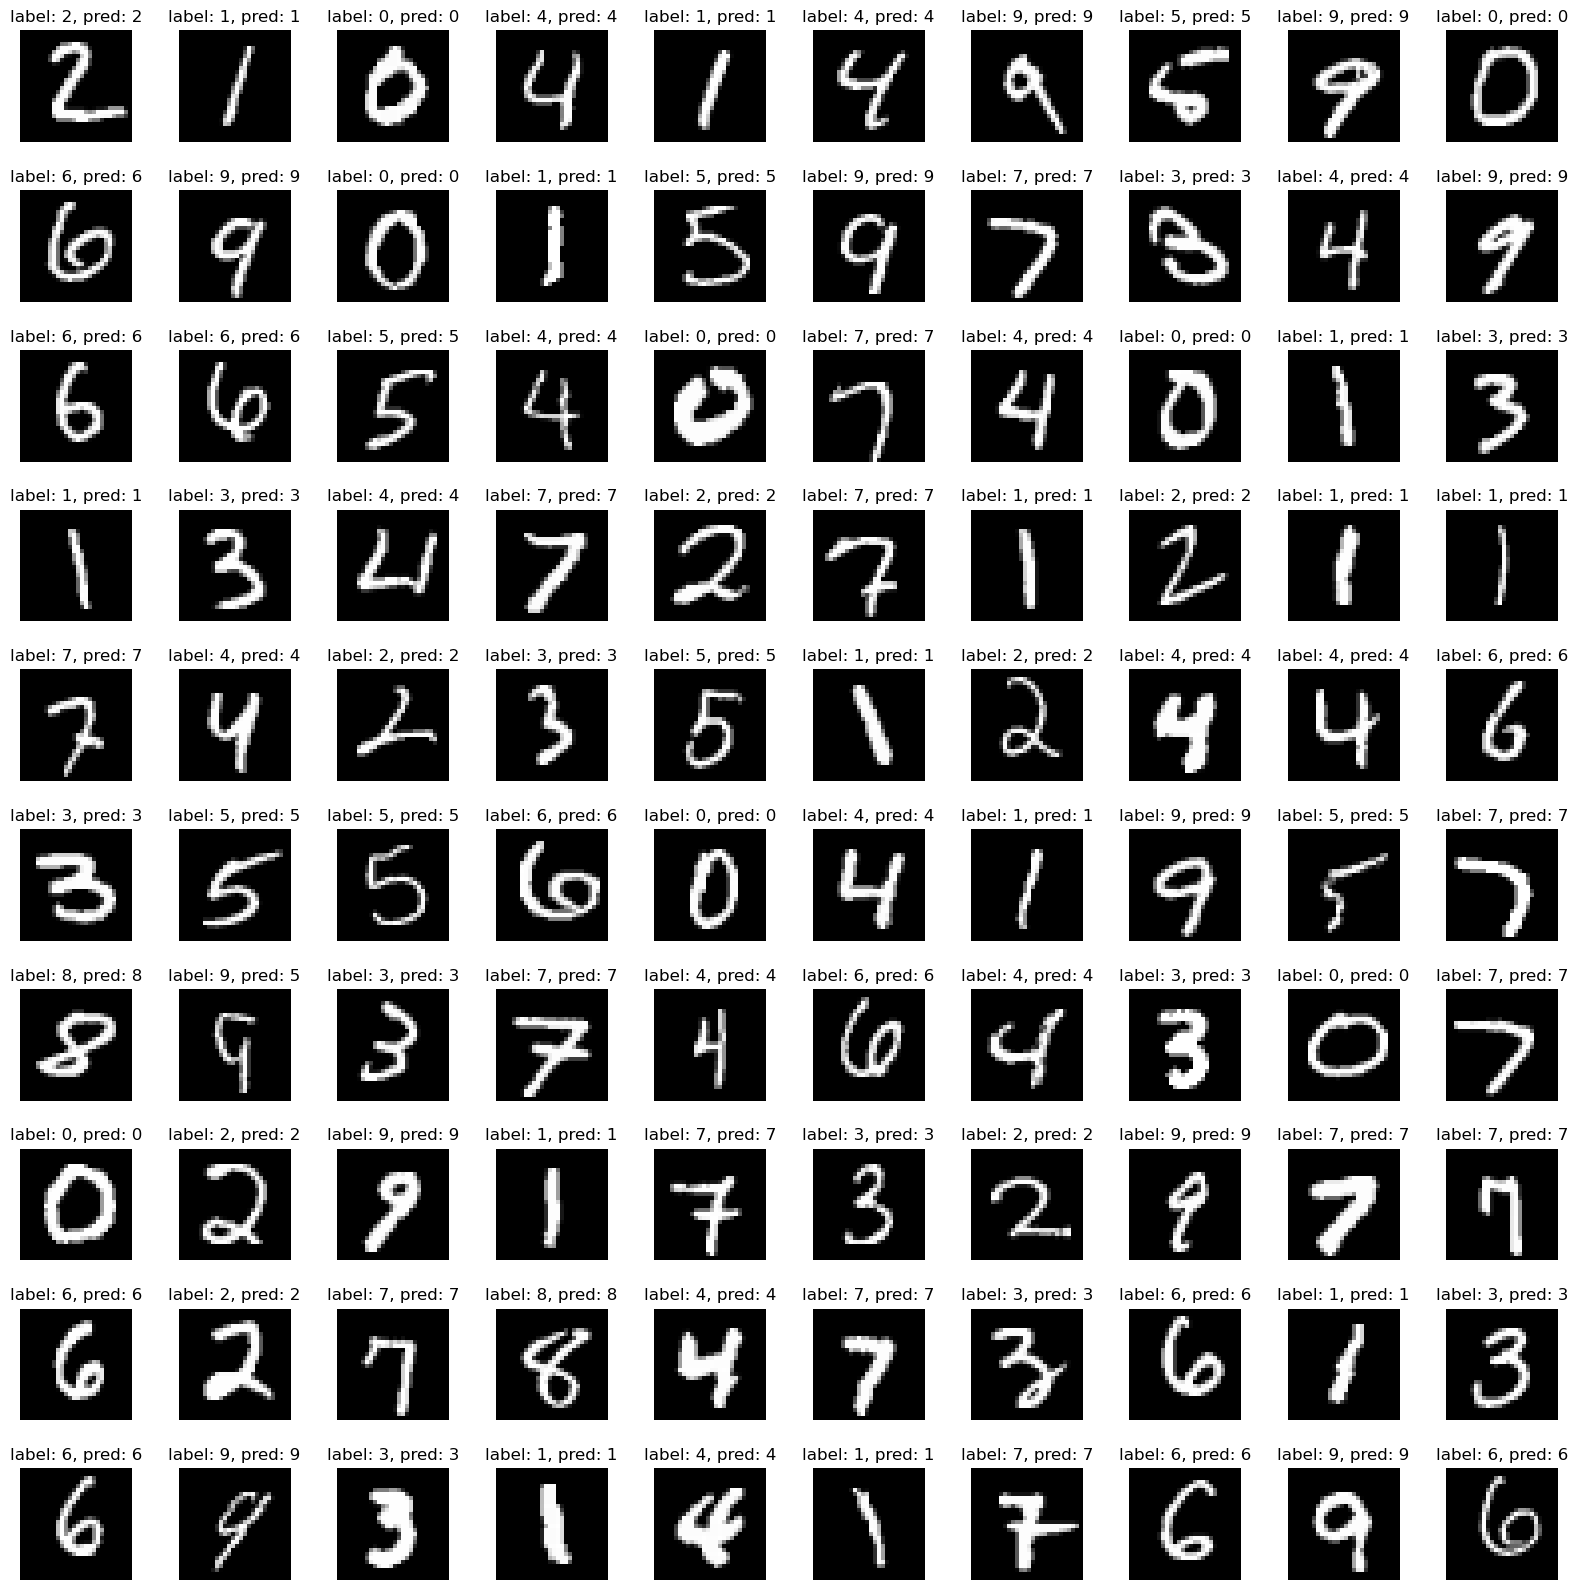

In [11]:
fig = plt.figure(figsize=(16, 16))

for i in range(1, 101):
    ax = plt.subplot(10, 10, i)
    predict_nth_image(ax, i)

plt.tight_layout(h_pad=2)